# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras 

# Fashion MNIST datasets 

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

0 ~ 255 정수 범위의 입력값들을 0.0 ~ 1.0 범위의 실수(float)으로 변환 -> 훈련 성능을 높이기 위해서 

In [5]:
np.min(x_train_full), np.max(x_train_full)

(0, 255)

In [6]:
x_train_full_scaled = x_train_full / 255.0
x_test_scaled = x_test / 255.0

In [7]:
np.min(x_train_full_scaled), np.max(x_train_full_scaled)

(0.0, 1.0)

훈련 셋 전체를 훈련 셋(train set)과 검증 셋(validation set)으로 나눔 

In [8]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full_scaled, y_train_full,
                                                  stratify=y_train_full,
                                                  test_size=0.1, 
                                                  random_state=42)
#> 훈련 셋(x_train), 검증 셋(x_val), 훈련 타겟(y_train), 검증 타겟(y_val)

In [9]:
x_train.shape, x_val.shape

((54000, 28, 28), (6000, 28, 28))

In [10]:
y_train.shape, y_val.shape

((54000,), (6000,))

# DNN

input layer --> flatten layer --> dense layer(300 units) --> dense layer(100 units) --> output layer 

In [11]:
# Sequential 모델 생성 
model = keras.Sequential()
# flatten layer 추가: (28, 28) shape 배열 --> (784,) shape 배열 
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# 첫번째 hidden layer
model.add(keras.layers.Dense(units=300, activation='relu'))
# 두번째 hidden layer
model.add(keras.layers.Dense(units=100, activation='relu'))
# output layer
model.add(keras.layers.Dense(units=10, activation='softmax'))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


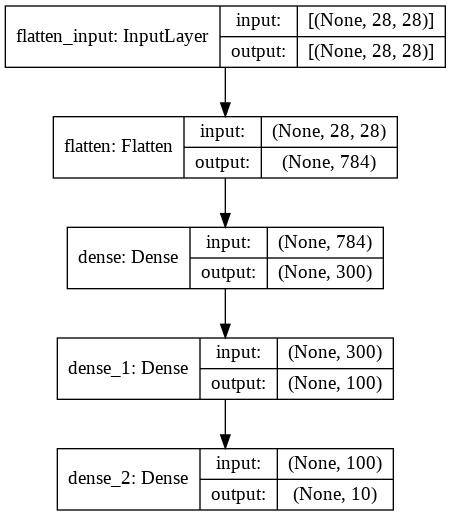

In [12]:
keras.utils.plot_model(model, show_shapes=True, to_file='dnn1.png')

In [13]:
# 모델 컴파일
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
# 위 'sgd'는 keras.optimizers.SGD() 를 주는 것과 똑같다 

In [14]:
# 모델 훈련 
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1688/1688 [==============================] - 7s 2ms/step - loss: 0.9657 - accuracy: 0.6955 - val_loss: 0.5124 - val_accuracy: 0.8235
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4963 - accuracy: 0.8300 - val_loss: 0.4560 - val_accuracy: 0.8427
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4520 - accuracy: 0.8414 - val_loss: 0.5879 - val_accuracy: 0.7915
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4239 - accuracy: 0.8524 - val_loss: 0.3787 - val_accuracy: 0.8673
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3923 - accuracy: 0.8634 - val_loss: 0.3889 - val_accuracy: 0.8597
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3758 - accuracy: 0.8670 - val_loss: 0.3987 - val_accuracy: 0.8580
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3664 - accuracy: 0.8715 - val_loss: 0.3661 - val_accuracy:

In [15]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [16]:
history.params

{'epochs': 30, 'steps': 1688, 'verbose': 1}

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
np.around(history.history['loss'], decimals=3)

array([0.706, 0.486, 0.442, 0.414, 0.394, 0.379, 0.365, 0.354, 0.342,
       0.334, 0.325, 0.317, 0.311, 0.304, 0.296, 0.291, 0.285, 0.281,
       0.275, 0.271, 0.265, 0.261, 0.255, 0.252, 0.246, 0.243, 0.239,
       0.235, 0.232, 0.228])

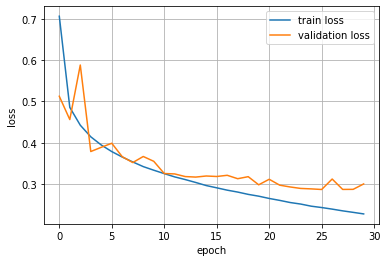

In [19]:
# 손실 곡선
plt.plot(history.epoch, history.history['loss'], label='train loss')
plt.plot(history.epoch, history.history['val_loss'], label='validation loss')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

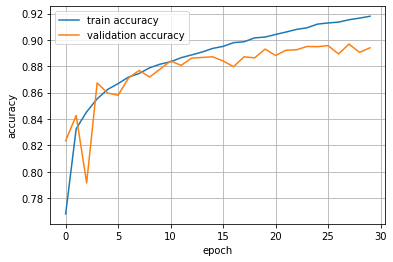

In [20]:
# 정확도 곡선
plt.plot(history.epoch, history.history['accuracy'], label='train accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='validation accuracy')

plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

손실 곡선과 정확도 곡선을 그려보면 

* 훈련 셋에서는 손실은 작아지고 정확도는 좋아짐
* 검증 셋에서는 어느 순간(epoch)까지는 손실이 줄어들고 정확도도 좋다지다가, 어느 순간 이후로는 더이상 개선되지 않음 - 과대적합(overfitting) 
* epoch를 적절한 순간에 멈추는 기법이 필요 

In [21]:
loss_acc_hist = pd.DataFrame(history.history)
loss_acc_hist.head()

,loss,accuracy,val_loss,val_accuracy
0,0.705953,0.767981,0.512381,0.823500
1,0.485550,0.832537,0.456046,0.842667
2,0.442363,0.845426,0.587947,0.791500
3,0.414303,0.855278,0.378691,0.867333
4,0.394478,0.862389,0.388927,0.859667


In [22]:
loss_acc_hist.tail()

,loss,accuracy,val_loss,val_accuracy
25,0.243201,0.912833,0.286875,0.895667
26,0.239379,0.913463,0.312157,0.889333
27,0.235176,0.915278,0.287040,0.896833
28,0.231554,0.916500,0.287224,0.890500
29,0.227778,0.917926,0.300290,0.894000


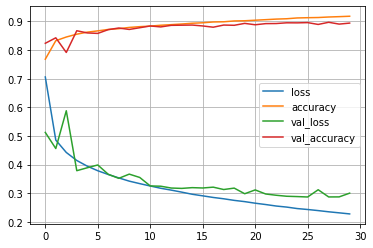

In [23]:
loss_acc_hist.plot()

plt.grid()
plt.show()

# Optimizer 튜닝

Optimizer - '밑바닥부터 시작하는 딥러닝' 6장 참고 

* sgd 
* RMSProp
* Adam

In [24]:
def create_model(): 
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(units=300, activation='relu'))
    model.add(keras.layers.Dense(units=100, activation='relu'))
    model.add(keras.layers.Dense(units=10, activation='softmax'))
    return model

In [25]:
model1 = create_model()
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Momentum

In [26]:
optimizer = keras.optimizers.SGD(momentum=0.9)
model1.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [27]:
history1 = model1.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6843 - accuracy: 0.7622 - val_loss: 0.4232 - val_accuracy: 0.8385
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3910 - accuracy: 0.8541 - val_loss: 0.3756 - val_accuracy: 0.8587
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3490 - accuracy: 0.8735 - val_loss: 0.3269 - val_accuracy: 0.8768
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3233 - accuracy: 0.8802 - val_loss: 0.3187 - val_accuracy: 0.8860
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.8889 - val_loss: 0.3333 - val_accuracy: 0.8793
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2899 - accuracy: 0.8923 - val_loss: 0.3452 - val_accuracy: 0.8700
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2794 - accuracy: 0.8943 - val_loss: 0.2965 - val_accuracy:

In [28]:
hist1 = pd.DataFrame(history1.history)  # dict --> DataFrame 
hist1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.520922,0.813537,0.423206,0.838500
1,0.384484,0.858074,0.375608,0.858667
2,0.345841,0.872630,0.326898,0.876833
3,0.322010,0.880407,0.318677,0.886000
4,0.300813,0.888556,0.333339,0.879333


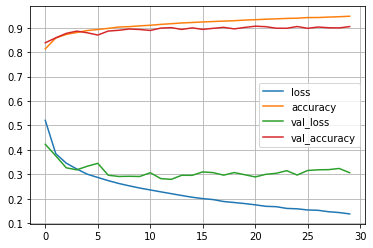

In [29]:
hist1.plot()
plt.grid()
plt.show()

In [30]:
np.argmin(hist1['val_loss'])

12

In [31]:
np.argmax(hist1['val_accuracy'])

20

## RMSProp

In [32]:
model2 = create_model()
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')
history2 = model2.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6453 - accuracy: 0.7730 - val_loss: 0.3828 - val_accuracy: 0.8612
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3990 - accuracy: 0.8597 - val_loss: 0.3481 - val_accuracy: 0.8772
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3644 - accuracy: 0.8687 - val_loss: 0.3673 - val_accuracy: 0.8700
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3578 - accuracy: 0.8739 - val_loss: 0.3672 - val_accuracy: 0.8737
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3458 - accuracy: 0.8799 - val_loss: 0.3744 - val_accuracy: 0.8797
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8860 - val_loss: 0.3917 - val_accuracy: 0.8727
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3422 - accuracy: 0.8849 - val_loss: 0.3780 - val_accuracy:

In [33]:
hist2 = pd.DataFrame(history2.history)
hist2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.506179,0.817056,0.382814,0.861167
1,0.394326,0.860870,0.348113,0.877167
2,0.369738,0.868870,0.367321,0.870000
3,0.359353,0.875741,0.367167,0.873667
4,0.350715,0.880704,0.374397,0.879667


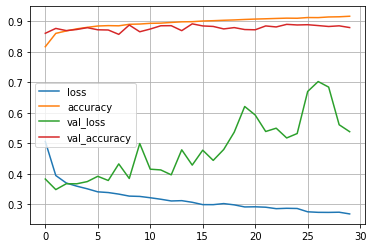

In [34]:
hist2.plot()  # 정확도/손실 곡선
plt.grid()
plt.show()

In [35]:
np.argmin(hist2['val_loss'])

1

In [36]:
np.min(hist2['val_loss'])

0.34811311960220337

## Adam, Nadam

# Callbakcs

콜백(callback): 훈련 과정(fit) 중간에 어떤 작업을 수행할 수 있도록 하는 함수 
모델을 훈련(fit)할 때 등록 

## EarlyStopping 

In [37]:
model3 = create_model()

In [38]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [39]:
early_stop = keras.callbacks.EarlyStopping(patience=2) # 조기 종료 콜백
#> val_loss를 모니터링하다가 val_loss가 patience 횟수 동안에 더이상 감소하지 않으면 epoch를 강제 종료 

history3 = model3.fit(x_train, y_train, epochs=30,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stop])

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6075 - accuracy: 0.7845 - val_loss: 0.3949 - val_accuracy: 0.8503
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8632 - val_loss: 0.3552 - val_accuracy: 0.8677
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3329 - accuracy: 0.8765 - val_loss: 0.3304 - val_accuracy: 0.8803
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3094 - accuracy: 0.8858 - val_loss: 0.3031 - val_accuracy: 0.8875
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8956 - val_loss: 0.3503 - val_accuracy: 0.8737
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2695 - accuracy: 0.8968 - val_loss: 0.3256 - val_accuracy: 0.8783


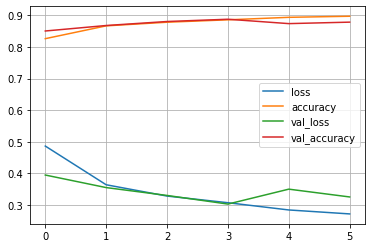

In [40]:
hist3 = pd.DataFrame(history3.history)

hist3.plot()
plt.grid()
plt.show()

In [41]:
model4 = create_model()

In [42]:
model4.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [43]:
history4 = model4.fit(x_train, y_train, epochs=30, 
                      validation_data=(x_val, y_val), 
                      callbacks=[early_stop])

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6380 - accuracy: 0.7673 - val_loss: 0.4809 - val_accuracy: 0.8318
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3984 - accuracy: 0.8566 - val_loss: 0.4221 - val_accuracy: 0.8475
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.3745 - accuracy: 0.8713 - val_loss: 0.5465 - val_accuracy: 0.8238
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3574 - accuracy: 0.8750 - val_loss: 0.3914 - val_accuracy: 0.8703
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3386 - accuracy: 0.8817 - val_loss: 0.3641 - val_accuracy: 0.8808
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3383 - accuracy: 0.8842 - val_loss: 0.3731 - val_accuracy: 0.8852
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3360 - accuracy: 0.8861 - val_loss: 0.4144 - val_accuracy:

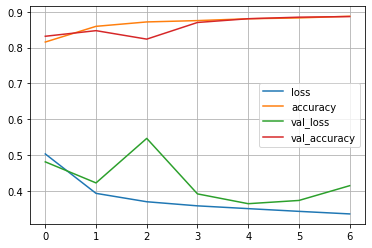

In [44]:
hist4 = pd.DataFrame(history4.history)

hist4.plot()
plt.grid()
plt.show()

# Adam 은 널뛰기가 좀 심해서 patience를 3 이상으로 올려도 괜찮을 것 같다 

In [45]:
model4.evaluate(x_val, y_val)
#> 에포크가 종료된 상태의 가중치 값들을 가지고 있는 모델 
#> val_loss가 가장 작은 상태의 가중치들을 가지고 있지 못함 

188/188 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8868


[0.4143681228160858, 0.8868333101272583]

## ModelCheckpoint 콜백 

In [46]:
model5 = create_model()

In [47]:
model5.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [48]:
model_check = keras.callbacks.ModelCheckpoint(filepath='best_model.h5', save_best_only=True)
#> 훈련(fit) 중에 val_loss 값이 가장 작은 에포크에서의 모델 상태(가중치, 층, 옵티마이저, ...)를 저장 

history5 = model5.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val),
                        callbacks=[model_check, early_stop])

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.9970 - accuracy: 0.6923 - val_loss: 0.5159 - val_accuracy: 0.8192
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5083 - accuracy: 0.8233 - val_loss: 0.4488 - val_accuracy: 0.8477
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4550 - accuracy: 0.8415 - val_loss: 0.4150 - val_accuracy: 0.8598
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4294 - accuracy: 0.8467 - val_loss: 0.4262 - val_accuracy: 0.8585
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4058 - accuracy: 0.8574 - val_loss: 0.4154 - val_accuracy: 0.8520


In [49]:
model5.evaluate(x_val, y_val)
#> fit의 마지막 epoch 결과와 동일 

188/188 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8520


[0.4154001474380493, 0.8519999980926514]

In [50]:
# HDF5(.h5) 형식으로 저장된 keras 신경망 모델을 메모리에 로드 
best_model = keras.models.load_model(filepath='best_model.h5')

In [51]:
best_model.evaluate(x_val, y_val)
#> 훈련 과정에서 val_loss가 가장 작은 결과와 동일 

188/188 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8598


[0.41503074765205383, 0.8598333597183228]

# Keras 모델 저장/가중치 저장과 복원

## 모델 전체를 저장/복원

In [52]:
# 모델 전체 저장 
keras.models.save_model(model=best_model, filepath='save_test.h5')

In [53]:
# 모델 전체 복원 
recovered_model = keras.models.load_model('save_test.h5')

In [54]:
recovered_model.predict(x_val[:2])

array([[1.25568032e-01, 5.51714236e-03, 1.58898048e-02, 7.94486701e-01,
        1.17380349e-02, 2.45876265e-07, 4.65577766e-02, 8.03029536e-07,
        2.41159098e-04, 3.00120604e-07],
       [1.48477161e-03, 9.88877833e-01, 2.54154275e-03, 4.69719339e-03,
        1.80429255e-03, 1.11655994e-04, 1.46083665e-04, 2.52896629e-04,
        6.80895828e-05, 1.56673104e-05]], dtype=float32)

In [55]:
recovered_model.evaluate(x_val, y_val)

188/188 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8598


[0.41503074765205383, 0.8598333597183228]

## 모델의 가중치 저장/복원 

In [56]:
# 모델의 가중치만 저장 
best_model.save_weights(filepath='best_weight.h5')

In [57]:
# 파일에 저장된 가중치를 메모리에 로드하려면, 가중치를 저장했었던 모델과 동일한 모델을 먼저 생성 
# 동일한 layer 개수, 각 층에서 동일한 unit들의 개수와 동일한 활성화 함수 
model = create_model()

In [58]:
# 구조가 동일한 모델에서 load_weights 메서드 호출 
model.load_weights(filepath='best_weight.h5')

In [59]:
# weight가 로드가 되면 예측(predict)가 가능 
model.predict(x_val[:2])

array([[1.25568032e-01, 5.51714236e-03, 1.58898048e-02, 7.94486701e-01,
        1.17380349e-02, 2.45876265e-07, 4.65577766e-02, 8.03029536e-07,
        2.41159098e-04, 3.00120604e-07],
       [1.48477161e-03, 9.88877833e-01, 2.54154275e-03, 4.69719339e-03,
        1.80429255e-03, 1.11655994e-04, 1.46083665e-04, 2.52896629e-04,
        6.80895828e-05, 1.56673104e-05]], dtype=float32)

In [60]:
# 가중치들만 로드한 모델인 경우에는 컴파일이 되지 않으면, loss와 metrics이 설정되어 있지 않기 때문에,
# evaluate 메서드가 에러를 발생시킴 
# 가중치들만 로드한 경우에는 evaluate 를 사용하기 위해서는 compile을 먼저 호출해야 함 
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.evaluate(x_val, y_val)

188/188 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8646


[0.41503074765205383, 0.8598333597183228]

# Dropout 규제 

input layer --> flatten layer --> dense layer --> dropout --> dense layer --> dropout --> output layer

In [61]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(units=300, activation='relu'))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
________________________________________________

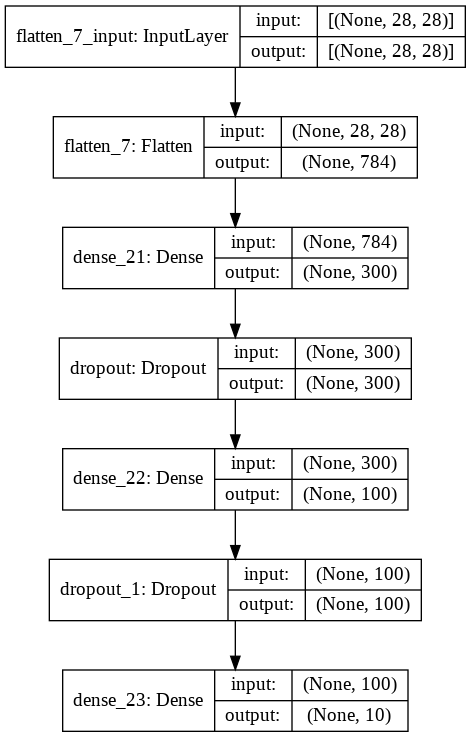

In [62]:
keras.utils.plot_model(model, show_shapes=True, to_file='dropout_model.png')

In [63]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [64]:
model_check = keras.callbacks.ModelCheckpoint(filepath='dropout_best.h5', save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(patience=2)

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), 
                    callbacks=[model_check])

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7722 - accuracy: 0.7270 - val_loss: 0.4241 - val_accuracy: 0.8392
Epoch 2/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4777 - accuracy: 0.8341 - val_loss: 0.4160 - val_accuracy: 0.8533
Epoch 3/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4742 - accuracy: 0.8423 - val_loss: 0.4240 - val_accuracy: 0.8458
Epoch 4/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4850 - accuracy: 0.8449 - val_loss: 0.4160 - val_accuracy: 0.8610
Epoch 5/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4958 - accuracy: 0.8449 - val_loss: 0.4178 - val_accuracy: 0.8607
Epoch 6/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.4971 - accuracy: 0.8445 - val_loss: 0.3832 - val_accuracy: 0.8712
Epoch 7/30
1688/1688 [==============================] - 4s 3ms/step - loss: 0.5066 - accuracy: 0.8492 - val_loss: 0.4357 - val_accuracy:

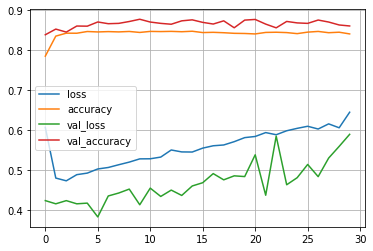

In [65]:
hist = pd.DataFrame(history.history)

hist.plot()
plt.grid()
plt.show()

In [66]:
np.argmin(hist['val_loss'])

5